<h1 style="color:red;">Question I</h1>

<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<ol>
    <li>
        Simple linear regression contains only one variable \(x_{i}\) and its corresponding \(\beta_{i}\). It is represented with a model of the form:
        \(Y_{i}=\beta_{0}+\beta_{1}x_{i}+\epsilon_{i}\)
        <br/>
        Multiple linear regression, however, contains multiple variables and their corresponding \(\beta\)s, which allows us to study more complex relationships that depend on more factors. It can be represented with a model of the form:<br/>
        \(\begin{gather*} Y_{i}=\beta_{0}+\sum_{k=1}^{n}(\beta_{k}x_{k}) +\epsilon_{i}\end{gather*}\)
    </li>
    <br/>
    <li>
        When using an indicator variable, \(Y_{i}\) only has 2 possible values (without accounting for the random error of \(\epsilon_{i}\), either <br/>\(x_{i}=0\Rightarrow Y_{i}=\beta_{0}\) or
        <br/>\(x_{i}=1\Rightarrow Y_{i}=\beta_{0}+\beta_{1}\)
        <br/><br/>
        When using a continuous variable, however, then \(x_{i}\) can take on a whole range of values.
        <br/>Thus, \(\beta_{1}x_{i}\) is also continuous.
        <br/><br/>This results in a continuous range of possible values for:
        <br/>\(Y_{i}=\beta_{0}+\beta_{1}x_{i}\)
    </li>
    <br/>
    <li>
        With simple linear regression, \(Y_{i}=\beta_{0}+\beta_{1}x_{i}\) is a function which progresses linearly.
        <br/>When we introduce an indicator variable and have multiple linear regression, the model becomes \(Y_{i}=\beta_{0}+\beta_{1}x_{i}+\beta_{2}1_{\text{group}}\)
        <br/>
        With this model, we create two parrallel lines in the graphical representation, one for \(1_{\text{group}}=0\) and another for \(1_{\text{group}}=1\)
    </li>
    <br/>
    <li>
        By adding an interaction term, the model becomes
        <br/>
        \(Y_{i}=\beta_{0}+\beta_{1}x_{i}+\beta_{2}1_{\text{group}}+\beta_{3}x_{i}\cdot1_{\text{group}}\)
        <br/>
        Here, \(\beta_{3}\) represents the difference in slopes between the baseline group and the indicated group (so between \(1_{\text{group}}=0\) and \(1_{\text{group}}=1\)
    </li>
    <br/>
    <li>
        If the Multiple Linear Regression model is based only on indicator variables, then the linear form is:
        \(\begin{gather*} Y_{i}=\beta_{0}+\sum_{k=1}^n(\beta_{k}1_{\text{group k}}) \end{gather*} \)
<br/>
<br/>
        If \(x_{i}\) is in the group \(k\), then \(Y_{i}=\beta_{0}+\beta_{k} \), so the encoding of each group is binary, either \(x_{i}\) is in the group, or it is not in the group.
    </li>
</ol>


<h1 style="color:red;">Question II</h1>

<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<ol>
    <li>
        The following are the outcome and predictors:<br/>
        The outcome \(Y_{i}\) is the sports equipment sold<br/>
        The predictor \(x_{1}\) is the amount spent on TV ads<br/>
        The predictor \(x_{2}\) is the amount spent on online ads<br/>
        <br/>
        Without the interactions, the linear form would be:<br/>
        \(\begin{gather*} Y_{i}=\beta_{0}+\beta_{1}x_{1_{i}}+\beta_{2}x_{2_{i}} \end{gather*} \)
        <br/>
        With the interactions, the linear form would be:<br/>
        \(\begin{gather*} Y_{i}=\beta_{0}+\beta_{1}x_{1_{i}}+\beta_{2}x_{2_{i}}+\beta_{3}(x_{1_{i}}\cdot x_{2_{i}}) \end{gather*}\)
        <br/><br/>
        In this scenario, the effectiveness of each advertising campaign can depend on the amount spent on the other campaign. This is what is represented by the interaction \(\beta_{3}(x_{1_{i}}\cdot x_{2_{i}})\)<br/><br/>
        Thus, the difference between predictions from both models is that in the model without interactions, we don't take into account the effect of the effectiveness of each campaign on the other.
    </li>
    <li>
        To account for this change, we would have to change the linear form to:<br/>
        \(\begin{gather*} Y_{i}=\beta_{0}+\beta_{1}1_{[x_{1_{i}}=high]}+\beta_{2}1_{[x_{2_{i}}=high]}+\beta_{3}(1_{[x_{1_{i}}=high]}\cdot 1_{[x_{2_{i}}=high]}) \end{gather*}\)
    </li>
</ol>

<h1 style="color:red;">Question III</h1>

<h1 style="color:red;">Question IV</h1>

In [32]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 

import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        23:26:06   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<p>
    As seen in the previous homework, \(R^2\) is the proportion of variation in the outcome that is explained by the model.<br/>
Here, \(R^2\) is equal to \(0.176=17.6%\)<br/>

However, p-values measure the significance of each predictor in the model, with a low p-value suggesting strong evidence against the null hypothesis, i.e. that a predictor has a significant effect on the outcome.
<br/>
<br/>
This means that even if some predictors in the model have very high significance with a low p-value, there can still be a large amount of variability that could be accounted for by other factors not in the model.
<br/>
This way, it is possible to have a low \(R^2\) even with many of the coefficients havingvery strong evidence against the null hypothesis of "no effect".
</p>

<h1 style="color:red;">Question V</h1>

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


<h2 style="color:green;">Code block 1</h2>
<p>
This first block of code splits the pokeaman dataframe into two dataframes: pokeaman_train and pokeaman_test, by using the train_test_split() function, randomly distributing the rows into the two new dataframes.
</p>

In [35]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        23:26:14   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<h2 style="color:green;">Code block 2</h2>
<p>
    This block of code fits the data we have with the linear form:
    \(Y_{i}=\beta_{0}+\beta_{1}x_{\text{attack}}+\beta_{2}x_{\text{defense}} \)
</p>


In [36]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519905
'Out of sample' R-squared: 0.21208501873920738


<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<h2 style="color:green;">Code block 3</h2>
<p>
    This block of code first uses the model made using the pokeaman_train dataset, which is our sample. It uses said model and its linear form to predict the HP values for the pokeaman_test dataset.
    <br/>
    Then, it extracts the actual HP values from the pokeaman_test dataset.
    <br/>
    <br/>
    Finally, it calculates the in-sample \(R^2\) and the out-of-sample \(R^2\)
    <br/>
    Both of the \(R^2\) are pretty low, meaning this model does not explain a large amount of the variance in both datasets (15% and 21%)
</p>

In [37]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        23:26:19   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1182      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

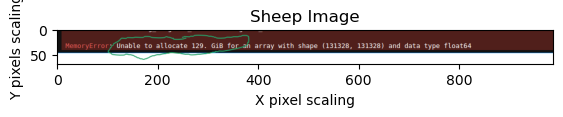

It needs 129 GIGABYTES of RAM to do this!!!!!


In [38]:
# I tried it >:)

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Sheep Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = mpimg.imread("/home/soulmou/Downloads/jupyter_stupid.png")
plt.imshow(image)
plt.show()
print("It needs 129 GIGABYTES of RAM to do this!!!!!")

<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<h2 style="color:green;">Code block 4</h2>
<p>
    This block of code makes a new linear form for the interactions between Attack, Defense, Speed, the Legendary status, the Special Defence and the Special attack of a Pokemon, and how those predictors affect the HP of the Pokémon (which is the outcome)
    <br/>
    <br/>
    Then, it fits the new model made and gives a summary of it.
</p>

In [41]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.4670944211577768
'Out of sample' R-squared: 0.0024853435077556935


<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<h2 style="color:green;">Code block 5</h2>
<p>
    This block of code gives both the in-sample and out-of-sample \(R^2\) (in the same way as code block 3), which are respectively 0.47 and 0.002.
    <br/>
    <br/>
    The in-sample \(R^2\) is quite high, as this model explains 47% of the variance in the in-sample dataset.
    <br/>
    However, the out-of-sample \(R^2\) is significantly lower, as this model would explain only 0.2% of the variance in the out-of-sample dataset.
    <br/>
    This is a sign of overfitting.
</p>

Here is a summary of my discussion with ChatGPT for question 5:

1. **Splitting Data (train/test)**:
   - We discussed how the **`train_test_split`** function from **`sklearn.model_selection`** randomly splits the dataset into training and testing sets.
   - The randomness is controlled by a seed (e.g., `np.random.seed(130)`) to ensure reproducibility.

2. **Linear Regression with `smf.ols`**:
   - You asked about **`smf.ols`**, a function from **`statsmodels.formula.api`** used to perform **Ordinary Least Squares (OLS)** linear regression using **R-style formulas** (e.g., `'HP ~ Attack + Defense'`).
   - We discussed the purpose of the formula and the basic components of a regression model, including how the dependent variable and predictors are specified.

3. **In-Sample vs Out-of-Sample \(R^2\)**:
   - You provided a block of code calculating both **in-sample** and **out-of-sample \(R^2\)** values, and we discussed the implications of the results.
   - In your case, the **in-sample \(R^2\)** was **0.47** (47%) and the **out-of-sample \(R^2\)** was **0.002** (0.2%).
   - The large difference between these values suggested **overfitting**, where the model performs well on the training data but fails to generalize to the testing data.

4. **Overfitting Explanation**:
   - **Overfitting** occurs when the model becomes too complex, capturing noise or specific patterns in the training data that do not generalize well to unseen data.
   - The low **out-of-sample \(R^2\)** suggests that the model is not robust and may require adjustments to avoid overfitting.

<h1 style="color:red;">Question VI</h1>

<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<p>
    To make the design matrix, the algorithm makes a row for every data point (here, for every pokemon). The first column is always a 1 (the intercept), then come the original predictors, and finally columns with the interaction terms, which makes new predictor variables.
    For example, in model 4, we'd have the following:
\(\begin{aligned}
HP &\sim \beta_0 + \beta_1 (\text{Attack}) + \beta_2 (\text{Defense}) + \beta_3 (\text{Speed}) + \beta_4 (\text{Legendary}) \\
&\quad + \beta_5 (\text{Sp. Def}) + \beta_6 (\text{Sp. Atk}) \\
&\quad + \beta_7 (\text{Attack} \times \text{Defense}) + \beta_8 (\text{Attack} \times \text{Speed}) + \ldots \\
&\quad + \beta_{9} (\text{Attack} \times \text{Legendary}) + \ldots \\
&\quad + \beta_{10} (\text{Attack} \times \text{Defense} \times \text{Speed}) + \ldots \\
&\quad + \text{(all higher-order interactions up to six-way)}.
\end{aligned}\)
<br/>
<br/>
        The condition number of a design matrix provides a measure of multicollinearity in a model fit. The bigger it is the larger the degree of multicollinearity.
    <br/><br/>
    Multicollinearity is not good for generalizability as it means that predictors are highly correlated, which implies that they carry redundant information. This leads to multiple solutions fitting the data just as well as one another, creating instability in the fitted model.
    <br/><br/>
    Centering and scaling makes interpreting the predictions on the data's original scale more complicated but it is indispensable to get the true evaluation of multicollinearity in the model fit.
</p>

In [42]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        23:26:37   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        23:26:45   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.3025      1.186     58.439      0.000      66.971      71.634
scale(center(Attack))      8.1099      1.340      6.051      0.000       5.475      10.745
scale(center(Defense))     2.9496      1.340      2.201      0.028       0.315       5.585
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling


Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.663
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.54e+16


In [45]:
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.665
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


Here is the ChatGPT summary for thsi question:

### **1. Linear Form Specification (`model4_linear_form`)**
- The model was specified as:
    model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")'
- This formula uses the `*` operator, which generates both **main effects** and all possible **interaction terms**:
  - **Main Effects**: `Attack`, `Defense`, `Speed`, `Legendary`, `Sp. Def`, `Sp. Atk`
  - **Interaction Terms**: Includes two-way interactions (e.g., `Attack:Defense`), three-way interactions (e.g., `Attack:Defense:Speed`), up to six-way interactions involving all predictors.

### **2. Creation of New Predictor Variables in the Design Matrix**
- The design matrix (`model4_spec.exog`) is constructed by expanding the formula:
  - It includes:
    - An **intercept** column.
    - Columns for **main effects** (original variables).
    - Columns for all possible **interaction terms**.
- This results in a design matrix with many columns, representing both the original variables and their interactions.

- For example, with the specified formula:
  - **Main effects**: 6 columns (one for each original variable).
  - **Interaction terms**: Includes 2-way, 3-way, up to 6-way interactions, resulting in a total of **64 columns**.

### **3. Multicollinearity in the Design Matrix**
- **Multicollinearity** occurs when two or more predictor variables (or their interactions) are highly correlated.
- This is problematic because:
  - **Coefficient Instability**: The regression model struggles to assign unique coefficients to correlated predictors, leading to large standard errors and unstable estimates.
  - **Overfitting**: The model may fit the training data very well (high in-sample \(R^2\)) but perform poorly on new data (low out-of-sample \(R^2\)) due to over-reliance on specific patterns in the training data.

### **4. Generalizability Issues Due to Multicollinearity**
- When predictor variables are highly correlated, the model becomes sensitive to small changes in the training data, which affects its ability to generalize to unseen data.
- This was observed in your model where the in-sample \(R^2\) was high (indicating a good fit on the training data) but the out-of-sample \(R^2\) was significantly lower, suggesting overfitting.

### **Key Takeaways**
- The complex interactions in the design matrix can lead to **multicollinearity**, which harms the model’s generalization capability.
- Addressing multicollinearity (e.g., through feature selection, regularization, or removing highly correlated predictors) can improve the out-of-sample performance of your model.

<h1 style="color:red;">Question VII</h1>

In [46]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        23:27:00   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [47]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488651776


In [48]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        23:27:05   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.2957246042708008


In [50]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        23:27:10   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [51]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)


'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.3505538923467793


In [52]:
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling

Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,15.4


In [53]:
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
<p>
    To make the linear form of model 5, we saw that the large amount of interactions overfit model 4, making unsuitable for generalization. Thus, we took the elements used in model 4 and arranged them as additive terms, just like was done in model 3.
</p>
<br/>
<p>
    Then, in model 6, we try to weed out the elements that don't account for a large variance in the model and turn the important values into binary indicator variables. 
    <br/><br/>
    For example, whether or not a Pokémon comes from generation 3 is not likely to help the prediction (the p-value for a null-hypothesis of no change is 0.555).<br/>
    Meanwhile, whether a Pokémon comes from generation 5 seems to have a big impact (this variable has a p-value of 0.004, which provides strong evidence against the null hypothesis, so we can reject it).
    <br/><br/>
    Thus, by looking at the potential effect of each variable of model 5, we can take the values that have a large effect on the model and use them for model 6.
</p>
<br/>
<p>
    In model 6, we can see that the in-sample and out-of-sample \(R^{2}\) are high enough, at 33% and 29% respectively.
    <br/>
    For model 7, we want to raise the variance explained by said model if possible.
    <br/>
    It is to do that that we change some predictor additions into interactions.
    <br/>
    Looking at model 7, it does work, as the in-sample \(R^{2}\) goes up to 37% and the out-of-sample \(R^{2}\) goes up to 35% (the out-of-sample \(R^{2}\) is also closer to the in-sample one here).
    <br/>
    Thus, model 7 is better at predictions.
</p>

<h1 style="color:red;">Question VIII</h1>

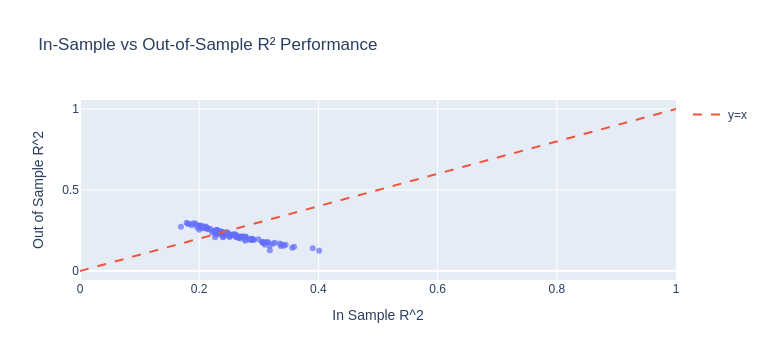

In [80]:
#### import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

# Define the linear model formula based on your pokeaman dataset
linear_form = 'HP ~ Attack * Defense + Speed * Q("Sp. Atk")'

# Number of repetitions for evaluation
reps = 100
in_sample_Rsquared = []
out_of_sample_Rsquared = []

# Loop to create, fit, and evaluate models multiple times
for i in range(reps):
    # Perform train-test split without using a fixed random seed
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=int(0.5 * pokeaman.shape[0]))
    
    # Fit the linear model on the training set
    model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
    
    # Calculate in-sample R^2
    in_sample_r2 = model_fit.rsquared
    in_sample_Rsquared.append(in_sample_r2)
    
    # Calculate out-of-sample R^2
    y_true = pokeaman_test.HP
    y_pred = model_fit.predict(pokeaman_test)
    
    # Handle cases where correlation could be NaN
    corr_coef = np.corrcoef(y_true, y_pred)[0, 1] if not np.isnan(np.corrcoef(y_true, y_pred)[0, 1]) else 0
    out_sample_r2 = corr_coef ** 2
    out_of_sample_Rsquared.append(out_sample_r2)

# Convert results to a DataFrame
results_df = pd.DataFrame({
    "In Sample R^2": in_sample_Rsquared,
    "Out of Sample R^2": out_of_sample_Rsquared
})

# Visualize the results using Plotly
fig = px.scatter(results_df, x="In Sample R^2", y="Out of Sample R^2",
                 title="In-Sample vs Out-of-Sample R² Performance",
                 labels={"x": "In-Sample R²", "y": "Out-of-Sample R²"},
                 opacity=0.7)

# Add a reference line y=x to assess generalizability
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='y=x', line=dict(dash='dash')))

# Display the plot
fig.show()

<p>
    In each iteration of the for loop, we compare the in-sample and out-of-sample \(R^2\) of the model we are using. Every iteration of the for loop uses a different sample, which means the in-sample and out-of-sample data points are different in-between iterations.
</p>
<p>
    If the out-of-sample \(R^2\) is larger than the in-sample \(R^2\), this is a sign of the sample not being representative of the population, or it could be by simple chance.
</p>
<p>
    However, we want our model to work well whatever the sample is. What this code does is it compares the \(R^2\) in-sample and out-of-sample to find how stably fitting our model is.
</p>
<p>
    From the graph given by the code, we can see a high negative correlation for the out-of-sample \(R^2\) compared to the in-sample \(R^2\).
    <br/>
    In other words, the larger the in-sample R^2 is, the lower the out-of-sample \(R^2\) is.
    <br/>
    This negative correlation suggests that the model may be overfitting
    <br/><br/>
    These datapoints find the \(x=y\) line at (0.25,0.25)
    <br/>
    This means that, on average, our linear form explains 25% of the variability in this dataset.
</p>

Here is the summary of my discussion with ChatGPT for Question 8:

1. **Adapting the Loop for "In-Sample" and "Out-of-Sample" \( R^2 \) Evaluation**:
    - We wrote a Python for loop to evaluate the performance of a regression model on different random splits of the dataset.
    - The loop repeatedly fits a model on a training subset and tests it on a different testing subset without using a fixed random seed for each iteration.
    - For each iteration, we recorded the in-sample \( R^2 \) (training performance) and the out-of-sample \( R^2 \) (testing performance).
    - We used these results to visualize the stability of the model's performance across different splits using a scatter plot.

2. **Purpose of This Demonstration**:
    - The primary goal of this demonstration was to assess the stability and generalizability of the regression model.
    - By comparing in-sample and out-of-sample \( R^2 \) values across multiple iterations, we could evaluate whether our model was overfitting (performing well on training data but poorly on new, unseen data).

3. **Interpreting the Results**:
    - If the out-of-sample \( R^2 \) is consistently lower than the in-sample \( R^2 \), it indicates overfitting. However, if the out-of-sample \( R^2 \) is sometimes higher, this could suggest that the training sample isn't fully representative of the overall population, or it could be due to randomness in the sampling process.
    - We observed a negative correlation between in-sample and out-of-sample \( R^2 \) values in the scatter plot.
        - When the model had a high in-sample \( R^2 \), it tended to have a lower out-of-sample \( R^2 \), indicating overfitting.
    - The data points intersected the \( x=y \) line around (0.25, 0.25), suggesting that on average, our model explains about 25% of the variance in both training and testing datasets.

4. **Conclusions**:
    - The negative correlation observed in the scatter plot implies that as the model fits the training data better (high in-sample \( R^2 \)), it becomes less effective at generalizing to new data (lower out-of-sample \( R^2 \)).
    - This pattern suggests the model might be too complex for the data, capturing noise rather than meaningful patterns, which undermines its predictive power on unseen data.
    - The fact that our model explains only around 25% of the variance highlights potential limitations in the model's specifications or the predictors used.

<h1 style="color:red;">Question IX</h1>

In [73]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
yhat_model7 = model7_fit.predict(pokeaman_test)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.36642028450259767 (original)
'In sample' R-squared:     0.5726118179916574 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363388299076 (gen1_predict_future)


In [76]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
yhat_model7 = model7_fit.predict(pokeaman_test)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")


'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.36642028450259767 (original)
'In sample' R-squared:     0.3904756578094537 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915489191068 (gen1to5_predict_future)


In [81]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
yhat_model6 = model6_fit.predict(pokeaman_test)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.38662360281118496 (original)
'In sample' R-squared:     0.44338805177272833 (gen1_predict_future)
'Out of sample' R-squared: 0.19328585342762092 (gen1_predict_future)


In [82]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
yhat_model6 = model6_fit.predict(pokeaman_test)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.38662360281118496 (original)
'In sample' R-squared:     0.335172798241148 (gen1to5_predict_future)
'Out of sample' R-squared: 0.2626269017880005 (gen1to5_predict_future)


<p>
With these blocks of code, what we are trying to see is how much (or how little) a model trained on certain generations can predict the ones that come after it. In other words, if a model is trained on generation 1, can it predict the HP of Pokémon in generation 5 or 6?
</p>
<br/>
<p>
    In the first block of code, we train model 7 on Pokémon from generation 1.<br/>
    The model 7 trained from data from all generations explains avout 37% of the variance both in-sample and out-of sample.
    <br/>
    However, even though the model 7 trained only on generation 1, has a much higher in-sample \(R^2\) (explaining 57% of the variance of HP in generation 1 Pokémon), it has an overwhelmingly smaller out-of-sample \(R^2\) of 11%.
    <br/><br/>
    This increase in in-sample \(R^2\) and drop in out-of-sample R^2 implies that model7 fits gen 1 data better but also that it overfits, that it does not generalize well in-between generations.
</p>
<br/><br/>
<p>
    The second block of code trains the model on generations 1 through 5 and tries to predict generation 6.
    <br/>
    The in-sample \(R^2\) of generations 1 through 5 is 0.39, which is actually a little higher than the original 0.37.
    <br/>
    The out-of-sample \(R^2\) is of 0.23, so when trained on generations 1 through 5, model 7 accounts for 23% of the variance of the HP in generation 6's Pokémon.
    <br/>This implies that there is still overfitting here.
</p>
<p>
    The third block of code trains model 6 on generation 1 and tries to predict other generations.
    <br/>
    The in-sample \(R^2\) of generation 1 is 44%. This is a lot higher than the original model 6's 33%.
    <br/>
    The out-of-sample \(R^2\), however is of 29%, once again suggesting overfitting when model 6 is trained on generation 1.
</p>
<p>
    The last block of code trains model 6 on generations 1 through 5 and tries to predict generation 6.
    <br/>
    The in-sample \(R^2\) of generations 1 through 5 is 0.33, which on par with the original in-sample \(R^2\).
    <br/>
    The out-of-sample \(R^2\) of the gen1-5 trained model is of 0.26, so when trained on generations 1 through 5, model 6 accounts for 26% of the variance of the HP in generation 6's Pokémon.
    <br/>This once again implies that there is still overfitting here.
</p>
<br/><br/>
<p>
    From this, can we conclude that we cannot accurately predict a Pokémon's HP if our model is trained on different generations? (this is a question to you, ChatGPT)
</p>